# Parametric Model-Based regression

    Notebook version: 1.3 (Sep 20, 2019)

    Author: Jesús Cid-Sueiro (jesus.cid@uc3m.es)
            Jerónimo Arenas García (jarenas@tsc.uc3m.es)

    Changes: v.1.0 - First version, expanding some cells from the Bayesian Regression 
                     notebook
             v.1.1 - Python 3 version.
             v.1.2 - Revised presentation. 
             v.1.3 - Updated index notation
    
    Pending changes: * Include regression on the stock data

In [1]:
# Import some libraries that will be necessary for working with data and displaying plots

# To visualize plots in the notebook
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.io       # To read matlab files
import pylab

## A quick note on the mathematical notation

In this notebook we will make extensive use of probability distributions. In general, we will use capital leters
${\bf X}$, $S$, $E$ ..., to denote random variables, and lower-case letters ${\bf x}$, $s$, $\epsilon$ ..., to denote the values they can take. 

In general, we will use letter $p$ for probability density functions (pdf). When necessary, we will use, capital subindices to make the random variable explicit. For instance, $p_{{\bf X}, S}({\bf x}, s)$ would be the joint pdf of random variables ${\bf X}$ and $S$ at values ${\bf x}$ and $s$, respectively. 

However, to avoid a notation overload, we will omit subindices when they are clear from the context. For instance, we will use $p({\bf x}, s)$ instead of $p_{{\bf X}, S}({\bf x}, s)$.

## 1. Model-based parametric regression

### 1.1. The regression problem

Given an observation vector ${\bf x}$, the goal of the regression problem is to find a function $f({\bf x})$ providing *good* predictions about some unknown variable $s$. To do so, we assume that a set of *labelled* training examples, $\{{\bf x}_k, s_k\}_{k=0}^{K-1}$ is available. 

The predictor function should make good predictions for new observations ${\bf x}$ not used during training. In practice, this is tested using a second set (the *test set*) of labelled samples.

### 1.2. The underlying model assumption

Many regression algorithms are grounded on the idea that all samples from the training set have been generated 
independently by some common stochastic process.

<img src="figs/data_model.png" width=180>

If $p({\bf x}, s)$ were known, we could apply estimation theory to estimate $s$ for a given ${\bf x}$ using $p$. For instance, we could apply any of the following classical estimates:

   * Maximum A Posterior (MAP): $$\hat{s}_{\text{MAP}} = \arg\max_s p(s| {\bf x})$$
   * Minimum Mean Square Error (MSE): $$\hat{s}_{\text{MSE}} = \mathbb{E}\{S |{\bf x}\} = \int s \, p(s| {\bf x}) \, ds $$

Note that, since these estimators depend on $p(s |{\bf x})$, knowing the posterior distribution of the target variable is enough, and we do not need to know the joint distribution $p({\bf x}, s)$.

More importantly, note that **if we knew the underlying model, we would not need the data** in ${\cal D}$ to make predictions on new data.

#### Exercise 1:

Assume the target variable $s$ is a scaled noisy version of the input variable $x$: 
$$
s = 2 x + \epsilon
$$
where $\epsilon$ is Gaussian a noise variable with zero mean and unit variance, which does not depend on $x$.

  1. Compute the target model $p(s| x)$
  2. Compute prediction $\hat{s}_\text{MAP}$ for an arbitrary input $x$
  3. Compute prediction $\hat{s}_\text{MSE}$ for an arbitrary input $x$
  4. Compute prediction $\hat{s}_\text{MSE}$ for input $x=4$



#### Solution:

[comment]: # (<SOL>)
[comment]: # (</SOL>)


S is caled noisy version of the input variable. That means that  the conditional probabibility model can be expresed like:


p(s∣x)=N(s;2x,1) 

and the gaussian model can be expressed as:

$$
p(s| x ) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac12(s-2x)^2\right)
$$


The maximun a posteriori is simply the mean of the gaussian model as we know $p({\bf x}, s)$:

$\hat{s}_\text{MAP}$ = 2*x

The mean square error will be the maximum of the probability function, in this case it will be the mean of the gaussian model:

$\hat{s}_\text{MSE}$ = 2*x

As we know, maximum a posteriori criteria and the mean square error criteria is the same in gaussian model.



In [2]:
# Funciones para los cálculos
def p_s_given_x(x):
    mean = 2 * x
    variance = 1
    return mean, variance

def s_map(x):
    return 2 * x

def s_mse(x):
    return 2 * x

# Valor de x arbitrario
x_arbitrary = 5  # Puedes cambiar este valor para ver diferentes resultados

# Cálculos
mean, variance = p_s_given_x(x_arbitrary)
s_map_prediction = s_map(x_arbitrary)
s_mse_prediction = s_mse(x_arbitrary)

# Predicción específica para x = 4
x_specific = 4
s_mse_specific_prediction = s_mse(x_specific)

# Resultados
print(f"Para x = {x_arbitrary}:")
print(f"Media (p(s|x)): {mean}")
print(f"Predicción MAP: {s_map_prediction}")
print(f"Predicción MSE: {s_mse_prediction}\n")

print(f"Para x = {x_specific}:")
print(f"Predicción MSE: {s_mse_specific_prediction}")

Para x = 5:
Media (p(s|x)): 10
Predicción MAP: 10
Predicción MSE: 10

Para x = 4:
Predicción MSE: 8


### 1.3. Model-based regression

In practice, the underlying model is usually unknown. 

Model based-regression methods exploit the idea of using the training data to estimate the posterior distribution $p(s|{\bf x})$ and then apply estimation theory to make predictions.

<img src="figs/ModelBasedReg.png" width=280>

### 1.4. Parametric model-based regression

In some cases, we may have a partial knowledge about the underlying mode. In this notebook we will assume that $p$ belongs to a parametric family of distributions $p(s|{\bf x},{\bf w})$, where ${\bf w}$ is some unknown parameter. 

#### Exercise 2:

Assume the target variable $s$ is a scaled noisy version of the input variable $x$: 
$$
s = w x + \epsilon
$$
where $\epsilon$ is Gaussian a noise variable with zero mean and unit variance, which does not depend on $x$. Assume that $w$ is known. 
  1. Compute the target model $p(s| x, w)$
  2. Compute prediction $\hat{s}_\text{MAP}$ for an arbitrary input $x$
  3. Compute prediction $\hat{s}_\text{MSE}$ for an arbitrary input $x$

#### Solution:

[comment]: # (<SOL>)
[comment]: # (</SOL>)


S is caled noisy version of the input variable. That means that  the conditional probabibility model can be expresed like:


p(s∣x)=N(s;wx,1) 

and the gaussian model can be expressed as:

$$
p(s| x ) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac12(s-wx)^2\right)
$$

The maximun a posteriori is simply the mean of the gaussian model as we know $p({\bf x}, s)$:

$\hat{s}_\text{MAP}$ = w*x

The mean square error will be the maximum of the probability function, in this case it will be the mean of the gaussian model:

$\hat{s}_\text{MSE}$ = w*x

As we know, maximum a posteriori criteria and the mean square error criteria is the same in gaussian model.


In [3]:
import numpy as np

# Funciones para los cálculos
def p_s_given_x_w(x, w):
    mean = w * x
    variance = 1
    return mean, variance

def s_map(x, w):
    return w * x

def s_mse(x, w):
    return w * x

# Valor de x arbitrario y un valor de w conocido
x_arbitrary = 5  # Puedes cambiar este valor para ver diferentes resultados
w_known = 3      # Ejemplo de un valor conocido para w

# Cálculos
mean, variance = p_s_given_x_w(x_arbitrary, w_known)
s_map_prediction = s_map(x_arbitrary, w_known)
s_mse_prediction = s_mse(x_arbitrary, w_known)

# Resultados
print(f"Para x = {x_arbitrary} y w = {w_known}:")
print(f"Media (p(s|x, w)): {mean}")
print(f"Predicción MAP: {s_map_prediction}")
print(f"Predicción MSE: {s_mse_prediction}\n")

Para x = 5 y w = 3:
Media (p(s|x, w)): 15
Predicción MAP: 15
Predicción MSE: 15



We will use the training data to estimate ${\bf w}$

<img src="figs/ParametricReg.png" width=300>

The estimation of ${\bf w}$ from a given dataset $\mathcal{D}$ is the goal of the following sections

## 2. Maximum Likelihood parameter estimation.

The ML (Maximum Likelihood) principle is well-known in statistics and can be stated as follows: take the value of the parameter to be estimated (in our case, ${\bf w}$) that best explains the given observations (in our case, the training dataset $\mathcal{D}$). Mathematically, this can be expressed as follows:
$$
\hat{\bf w}_{\text{ML}} = \arg \max_{\bf w} p(\mathcal{D}|{\bf w})
$$



#### Exercise 3:

All samples in dataset ${\cal D} = \{(x_k, s_k), k=0,\ldots,K-1 \}$ 
$$
s_k = w \cdot x_k + \epsilon_k
$$
where $\epsilon_k$ are i.i.d. (independent and identically distributed) Gaussian noise random variables with zero mean and unit variance, which do not depend on $x_k$. 

Compute the ML estimate, $\hat{w}_{\text{ML}}$, of $w$.



#### Solution:

[comment]: # (<SOL>)
# </SOL>

Tenemos:


p(s∣x)=N(s;wx,1) 

and the gaussian model can be expressed as:

$$
p(s| x ) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac12(s-wx_k)^2\right)
$$

and we have to estimate the w value that maximize the probability, we use maximum likelihood:

$$
\hat{\bf w}_{\text{ML}} = \arg \max_{\bf w} p(\mathcal{D}|{\bf w})
$$

so we will have 

$$
ln(p(s| x )) = k*ln(\frac{1}{\sqrt{2\pi}})- \sum_{k=0}^{K-1}\frac12(s-wx_k)^2
$$

Aplying the criteria:

$$
\hat{\bf w}_{\text{ML}} = \arg \max_{\bf w} p(\mathcal{D}|{\bf w}) 
                        = \arg \min_{\bf w} \sum_{k=0}^{K-1} \left(s_k-wx_k\right)^2
$$



$$
- 2 \sum_{k=0}^{K-1} \left(s_k-\hat{w}_\text{ML} x_k\right) x_k  = 0
$$

$$
\hat{w}_\text{ML} = \frac{\sum_{k=0}^{K-1} s_k x_k}
                         {\sum_{k=0}^{K-1} \left(x_k\right)^2} 

* **4.2.** Compute the ML estimate

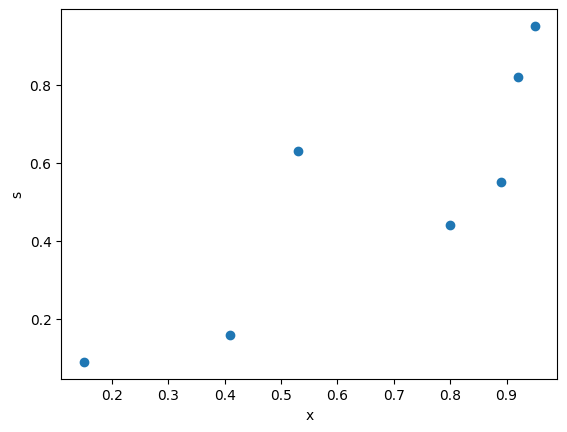

The ML estimate is 0.79709787816564


In [4]:
# wML = <FILL IN>
X = np.array([0.15, 0.41, 0.53, 0.80, 0.89, 0.92, 0.95]) 
s = np.array([0.09, 0.16, 0.63, 0.44, 0.55, 0.82, 0.95]) 

plt.figure()
plt.scatter(X, s)
plt.xlabel('x')
plt.ylabel('s')
plt.show()

wML = np.sum(X*s) / np.sum(X*X)

print("The ML estimate is {}".format(wML))

* **4.3.** Plot the likelihood as a function of parameter $w$ along the interval $-0.5\le w \le 2$, verifying that the ML estimate takes the maximum value.

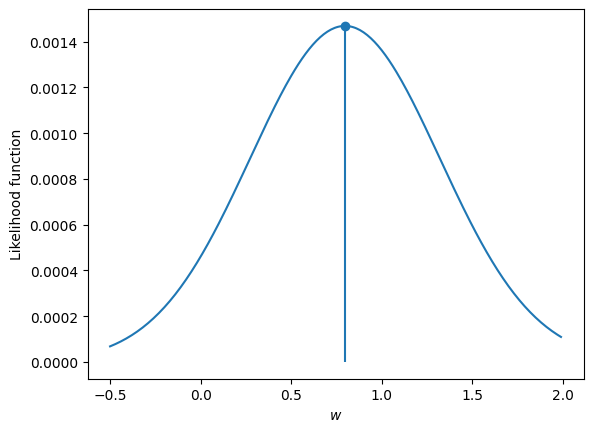

In [16]:
sigma_eps = 1
K = len(s)
wGrid = np.arange(-0.5, 2, 0.01)

p = []
for w in wGrid:
    d = s - X*w
    p.append((1.0/(np.sqrt(2*np.pi)*sigma_eps))**K * np.exp(-np.dot(d, d) / (2*sigma_eps**2)))

d = s-X*wML
# Compute the likelihood for the ML parameter wML
pML = [(1.0/(np.sqrt(2*np.pi)*sigma_eps))**K * np.exp(-np.dot(d, d) / (2*sigma_eps**2))]

# Plot the likelihood function and the optimal value
plt.figure()
plt.plot(wGrid, p)
plt.stem([wML], pML)
plt.xlabel('$w$')
plt.ylabel('Likelihood function')
plt.show()



Existen veces que aparecen valores átipicos con un valor en la probabilidad muy bajo, por lo que es normal que aparezcan valores muy pequeños en la gausiana (porque son multiplicaciones).

Hay veces que no es posible obtener una expresión analitica para obtener el máximo, entonces intentar máximizar la verosimilitud con técnicas de optimización.

* **4.4.** Plot the prediction function on top of the data scatter plot 

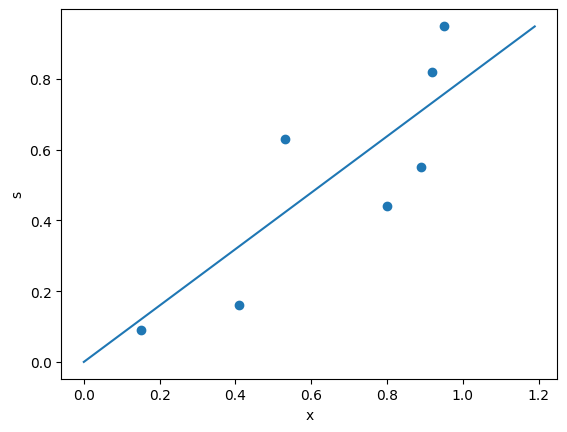

In [23]:
xgrid = np.arange(0, 1.2, 0.01)
sML = wML * xgrid
plt.figure()
plt.scatter(X, s)
plt.plot(xgrid, sML)
plt.xlabel('x')
plt.ylabel('s')
plt.axis('tight')
plt.show()

### 2.1. Model assumptions

In order to solve exercise 4 we have taken advantage of the statistical independence of the noise components. Some independence assumptions are required in general to compute the ML estimate in other scenarios.

In order to estimate ${\bf w}$ from the training data in a mathematicaly rigorous and compact form let us group the target variables into a vector
$$
{\bf s} = \left(s_0, \dots, s_{K-1}\right)^\top
$$
and the input vectors into a matrix
$$
{\bf X} = \left({\bf x}_0, \dots, {\bf x}_{K-1}\right)^\top
$$

We will make the following assumptions:

   * A1. All samples in ${\cal D}$ have been generated by the same distribution, $p({\bf x}, s \mid {\bf w})$
   * A2. Input variables ${\bf x}$ do not depend on ${\bf w}$. This implies that
$$
p({\bf X} \mid {\bf w}) = p({\bf X})
$$
   * A3. Targets $s_{0},\ldots, s_{K-1}$ are statistically independent, given ${\bf w}$ and the inputs ${\bf x}_0,\ldots, {\bf x}_{K-1}$, that is:
$$
p({\bf s} \mid {\bf X}, {\bf w}) = \prod_{k=0}^{K-1} p(s_k \mid {\bf x}_k, {\bf w})
$$
   

Since ${\cal D} = ({\bf X}, {\bf s})$, we can write
$$p(\mathcal{D}|{\bf w}) 
    = p({\bf s}, {\bf X}|{\bf w}) 
    = p({\bf s} | {\bf X}, {\bf w}) p({\bf X}|{\bf w})
$$
Using assumption A2,
$$
p(\mathcal{D}|{\bf w}) 
    = p({\bf s} | {\bf X}, {\bf w}) p({\bf X})
$$

and, finally, using assumption A3, we can express the estimation problem as the computation of

\begin{align}
\hat{\bf w}_{\text{ML}}
                &= \arg \max_{\bf w} p({\bf s}|{\bf X},{\bf w})  \\
   \qquad \quad &= \arg \max_{\bf w} \prod_{k=0}^{K-1} p(s_k \mid {\bf x}_k, {\bf w})  \\
   \qquad \quad &= \arg \max_{\bf w} \sum_{k=0}^{K-1}\log  p(s_k \mid {\bf x}_k, {\bf w})
\end{align}

Any of the last three terms can be used to optimize ${\bf w}$. The sum in the last term is usually called the **log-likelihood** function, $L({\bf w})$, whereas the product in the previous line is simply referred as the **likelihood** function.

### 2.2. Summary.

Let's summarize what we need to do in order to design a regression algorithm based on ML estimation:

1. Assume a parametric data model $p(s| {\bf x},{\bf w})$
2. Using the data model and the i.i.d. assumption, compute $p({\bf s}| {\bf X},{\bf w})$.
3. Find an expression for ${\bf w}_{\text{ML}}$
4. Assuming ${\bf w} = {\bf w}_{\text{ML}}$, compute the MAP or the minimum MSE estimate of $s$ given ${\bf x}$.

## 3. ML estimation for a Gaussian model.

### 3.1. Step 1: The Gaussian generative model

Let us assume that the target variables $s_k$ in dataset $\mathcal{D}$ are given by
$$
s_k = {\bf w}^\top {\bf z}_k + \varepsilon_k
$$

where ${\bf z}_k$ is the result of some transformation of the inputs, ${\bf z}_k = T({\bf x}_k)$, and $\varepsilon_k$ are i.i.d. instances of a Gaussian random variable with mean zero and varianze $\sigma_\varepsilon^2$, i.e.,
$$
p_E(\varepsilon) = \frac{1}{\sqrt{2\pi}\sigma_\varepsilon}
                   \exp\left(-\frac{\varepsilon^2}{2\sigma_\varepsilon^2}\right)
$$



Assuming that the noise variables are independent of ${\bf x}$ and ${\bf w}$, then, for a given ${\bf x}$ and ${\bf w}$, the target variable is gaussian with mean ${\bf w}^\top {\bf z}_k$ and variance $\sigma_\varepsilon^2$
$$
p(s|{\bf x}, {\bf w}) = p_E(s-{\bf w}^\top{\bf z}) =
    \frac{1}{\sqrt{2\pi}\sigma_\varepsilon}
    \exp\left(-\frac{(s-{\bf w}^\top{\bf z})^2}{2\sigma_\varepsilon^2}\right)
$$

### 3.2. Step 2: Likelihood function

Now we need to compute the likelihood function $p({\bf s}, {\bf X} | {\bf w})$. If the samples are i.i.d. we can write
$$
p({\bf s}| {\bf X}, {\bf w})
    = \prod_{k=0}^{K-1} p(s_k| {\bf x}_k, {\bf w}) 
    = \prod_{k=0}^{K-1} \frac{1}{\sqrt{2\pi}\sigma_\varepsilon}
    \exp\left(-\frac{\left(s_k-{\bf w}^\top{\bf z}_k\right)^2}{2\sigma_\varepsilon^2}\right) \\
    = \left(\frac{1}{\sqrt{2\pi}\sigma_\varepsilon}\right)^K
      \exp\left(-\sum_{k=1}^K \frac{\left(s_k-{\bf w}^\top{\bf z}_k\right)^2}{2\sigma_\varepsilon^2}\right) \\
$$

Finally, grouping variables ${\bf z}_k$ in
$${\bf Z} = \left({\bf z}_0, \dots, {\bf z}_{K-1}\right)^\top$$
we get
$$
p({\bf s}| {\bf X}, {\bf w})
    = \left(\frac{1}{\sqrt{2\pi}\sigma_\varepsilon}\right)^K
      \exp\left(-\frac{1}{2\sigma_\varepsilon^2}\|{\bf s}-{\bf Z}{\bf w}\|^2\right)
$$

### 3.3. Step 3: ML estimation.

The <b>maximum likelihood</b> solution is then given by:
$$
{\bf w}_{ML} = \arg \max_{\bf w} p({\bf s}|{\bf w}) = \arg \min_{\bf w} \|{\bf s} - {\bf Z}{\bf w}\|^2
$$
Note that $\|{\bf s} - {\bf Z}{\bf w}\|^2$ is the sum or the squared prediction errors (Sum of Squared Errors, SSE) for all samples in the dataset. This is also called the * **Least Squares** * (LS) solution.


The LS solution can be easily computed by differentiation,
$$
\nabla_{\bf w} \|{\bf s} - {\bf Z}{\bf w}\|^2\Bigg|_{{\bf w} = {\bf w}_\text{ML}}
= - 2 {\bf Z}^\top{\bf s} + 2 {\bf Z}^\top{\bf Z} {\bf w}_{\text{ML}}
= {\bf 0}
$$
and it is equal to
$$
{\bf w}_\text{ML} = ({\bf Z}^\top{\bf Z})^{-1}{\bf Z}^\top{\bf s}
$$


### 3.4. Step 4: Prediction function.

The last step consists on computing an estimate of $s$ by assuming that the true value of the weight parameters is ${\bf w}_\text{ML}$. In particular, the minimum MSE estimate is
$$
\hat{s}_\text{MSE} = \mathbb{E}\{s|{\bf x},{\bf w}_\text{ML}\}
$$

Knowing that, given ${\bf x}$ and ${\bf w}$, $s$ is normally distributed with mean ${\bf w}^\top {\bf z}$ we can write
$$
\hat{s}_\text{MSE} = {\bf w}_\text{ML}^\top {\bf z}
$$




#### Exercise 5:

Assume that the targets in the one-dimensional dataset given by

In [27]:
X = np.array([0.15, 0.41, 0.53, 0.80, 0.89, 0.92, 0.95]) 
s = np.array([0.09, 0.16, 0.63, 0.44, 0.55, 0.82, 0.95]) 

[0.15 0.41 0.53 0.8  0.89 0.92 0.95]


have been generated by the polynomial Gaussian model 
$$
s = w_0 + w_1 x + w_2 x^2 + \epsilon
$$
(i.e., with ${\bf z} = T(x) = (1, x, x^2)^\intercal$) with noise variance 


In [25]:
sigma_eps = 0.3

* **5.1.** Compute the ML estimate.

In [28]:
# Compute the extended input matrix Z
nx = len(X)
Z = np.hstack((np.ones((nx, 1)), X[:,np.newaxis], X[:,np.newaxis]**2)) #Apilamiento horizaontal
print(Z)

# Compute the ML estimate using linalg.lstsq from Numpy.
wML = np.linalg.lstsq(Z, s)[0] #Solo si ruido gaussiano
print(wML)


[[1.     0.15   0.0225]
 [1.     0.41   0.1681]
 [1.     0.53   0.2809]
 [1.     0.8    0.64  ]
 [1.     0.89   0.7921]
 [1.     0.92   0.8464]
 [1.     0.95   0.9025]]
[0.01643973 0.50472594 0.32250412]


* **5.2.** Compute the value of the log-likelihood function for ${\bf w}={\bf w}_\text{ML}$.

In [29]:
K = len(s)

# Compute the likelihood for the ML parameter wML
d = s-np.dot(Z, wML) #.dot es el profucto punto por punto

LwML = - K/2*np.log(2*np.pi*sigma_eps**2) - np.dot(d, d) / (2*sigma_eps**2)

print(LwML)

1.0272256462076963


* **5.3.** Plot the prediction function over the data scatter plot 

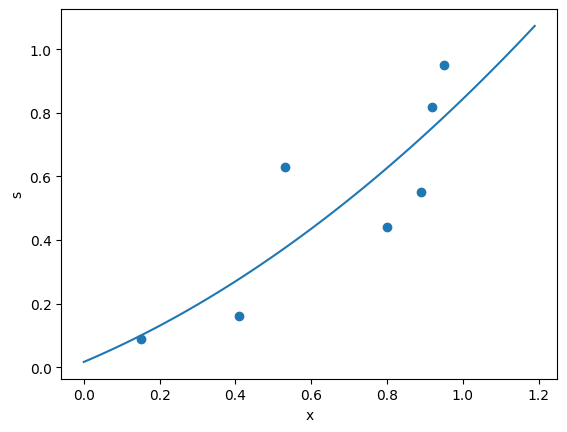

In [37]:
xgrid = np.arange(0, 1.2, 0.01)
nx = len(xgrid)
# Compute the input matrix for the grid data in x
Z = np.hstack((np.ones((nx, 1)), xgrid[:,np.newaxis], xgrid[:,np.newaxis]**2)) #Apilamiento horizaontal

sML = np.dot(Z, wML)

plt.figure()
plt.scatter(X, s)
plt.plot(xgrid,sML)
plt.xlabel('x')
plt.ylabel('s')
plt.axis('tight')
plt.show()

#### Exercise 6:

Assume the dataset $\mathcal{D} = \{(x_k, s_k, k=0,\ldots, K-1\}$ contains i.i.d. samples from a distribution with posterior density given by
$$
p(s \mid x, w) = w x \exp(- w x s), \qquad s\ge0, \,\, x\ge 0, \,\, w\ge 0
$$

* **6.1.** Determine an expression for the likelihood function


**Solution**:
<SOL>
The likelihood function is 
$$
p({\bf s}|w, {\bf X}) 
    = \prod_{k=0}^{K-1} w x_k \exp(- w x_k s_k)
    = w^K \left(\prod_{k=0}^{K-1} x_k\right)  \exp\left(- w \sum_{k=0}^{K-1} x_k s_k\right)
$$
</SOL>



**Solution**:
<SOL>
</SOL>


* **6.2.** Draw the likelihood function for the dataset in **Exercise 4** in the range $0\le w\le 6$.

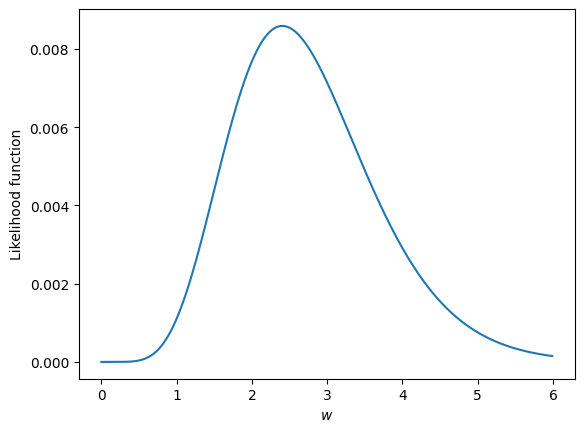

In [38]:
K = len(s)
wGrid = np.arange(0, 6, 0.01)

p = []
Px = np.prod(X)
xs = np.dot(X,s)
for w in wGrid:
    p.append((w**K)*Px*np.exp(-w*xs))

plt.figure()
plt.plot(wGrid, p)
plt.xlabel('$w$')
plt.ylabel('Likelihood function')
plt.show()

* **6.3.** Determine the maximum likelihood coefficient, $w_\text{ML}$. 

(*Hint: you can maximize the log-likelihood function instead of the likelihood function in order to simplify the differentiation*)

**Solution**:


Applyng the logarithm to the likelihood function we get

$$
\log p({\bf s}|{\bf w}, {\bf X}) 
    = K\log  w + \sum_{k=0}^{K-1} \log\left(x_k\right)  - w {\bf X}^\top {\bf s}
$$

which is minimum for 

$$
w_\text{ML} = \frac{K}{{\bf X}^\top {\bf s}}
$$

<SOL>
</SOL>

* **6.4.** Compute $w_\text{ML}$ for the dataset in **Exercise 4**

In [44]:
K = len(s)
wML = K /xs
print(wML)

2.4043415538915984


* **6.5.** Assuming $w = w_\text{ML}$, compute the prediction function based on the estimate $s_{MSE}$

**Solution**:

$$
\hat{s}_{\text{MSE}} = \mathbb{E}\{s |x, w\} = \int s w x \exp(w_\text{ML} x s) ds = \frac{1}{w_\text{ML} x}
$$

<SOL>
</SOL>

* **6.6.** Plot the prediction function obtained in ap. 6.5, and compare it with the linear predictor in exercise 4

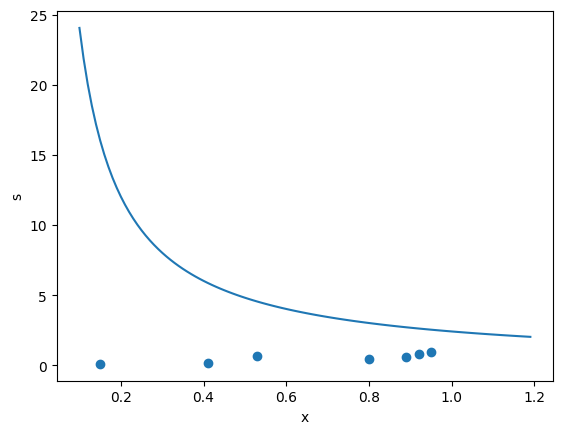

In [46]:
xgrid = np.arange(0.1, 1.2, 0.01)
sML = 1/xgrid*wML

plt.figure()
plt.scatter(X, s)
plt.plot(xgrid, sML)
plt.xlabel('x')
plt.ylabel('s')
plt.axis('tight')
plt.show()

Subjectively, we can see that the predictor computed in exercise 6 does not fit the given data very well. This could be a false perception. If the data have been truly generated by the parametric model assumed in exercise 6 (i.e. $p(s \mid x, w) = w x \exp(- w x s)$, the apparent missbehavior of the estimator could be caused by the natural randomness of the data, and a greater amount of data would show a better adjustement. 

Alternative, it may be the case the model assumed in sec. 6 is incorrect. Again, more data would be useful to asses that.

This shows that the choice of the data model is important. In many applications, no parametric data model is available, and the data scientist must make a choice based on the nature of the data or any previous knowledge about the statistical behavior of the data. 

If no previous information is available, the data scientist can try different models, and compare using validation data and some cross validation technique.
